# Calculate all length distributions and plot
Figures S3, S5, S7, and S8
## Import Modules

In [1]:
# Import modules
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import re

from turtles.turtles_utils import *

## Load Data

In [2]:
#: Signal names
signals = ['Ca', 'Co', 'Zn', 'Temp']

#: Overall directory for TdT project data and analysis
tdt_dir = 'C:/Users/jonst/Box Sync/All_dNTP_Data/Data_and_Results/'

#: Subdirectories of NGS runs
data_dir = {}
data_dir['Ca'] = tdt_dir + 'All_Data_Filtered_Trimmed/Ca_Controls/'
data_dir['Co'] = tdt_dir + 'All_Data_Filtered_Trimmed/Co_01_paired_simple_cut/'
data_dir['Zn'] = tdt_dir + 'All_Data_Filtered_Trimmed/Zn_Controls/'
data_dir['Temp'] = tdt_dir + 'All_Data_Filtered_Trimmed/Temp_101_gt0/'

#: Filename prefixes for 0 control conditions (Zn is mislabeled)
zero_control_conds = {}
zero_control_conds['Ca'] = ['NB_1MgTdTEnd-157462365',
                            'NB_2MgTdTEnd-157471352',
                            'NB_3MgTdTEnd-157460349',
                            'NB_4MgTdTEnd-157478337',
                            'NB_5MgTdTEnd-157474355',
                            'NB_6MgTdTEnd-157471356',
                            'NB_7MgTdTEnd-157469351']
zero_control_conds['Co'] = ['Namita_23630_Mg_Col_T0_1-167005853',
                            'Namita_23630_Mg_Col_T0_2-166999859',
                            'Namita_23630_Mg_Col_T0_3-167009845']
zero_control_conds['Zn'] = ['24755_Mg_2-215601402',
                            '24755_Mg_3-215601397',
                            '24755_ZnAc_1-215601398']
zero_control_conds['Temp'] = ['A4-FLD0289-37-1hr-1-242370305',
                              'A4-FLD0290-37-1h-2-242367356',
                              'A4-FLD0291-37-1hr-3-242383179']

#: Filename prefixes for 1 control conditions (Zn is mislabeled)
one_control_conds = {}
one_control_conds['Ca'] = ['NB_1CaTdTEnd-157464345',
                           'NB_2CaTdTEnd-157461337',
                           'NB_3CaTdTEnd-157467349',
                           'NB_4CaTdTEnd-157478336',
                           'NB_5CaTdTEnd-157471355',
                           'NB_6CaTdTEnd-157466351',
                           'NB_7CaTdTEnd-157467351']
one_control_conds['Co'] = ['Namita_23630_Cobalt_Col_T0_1-167010847',
                           'Namita_23630_Cobalt_Col_T0_2-166993853',
                           'Namita_23630_Cobalt_Col_T0_3-166999858']
one_control_conds['Zn'] = ['24755_ZnAc_2-215601399',
                           '24755_ZnAc_3-215601401',
                           '24755_No_TdT-215601400']
one_control_conds['Temp'] = ['A4-FLD0301-20-1hr-1-242375258',
                             'A4-FLD0302-20-1hr-2-242372261',
                             'A4-FLD0303-20-1hr-3-242369283']

#: suffix of R1 fastq file to read in each directory
filename_end = 'trimmed.fq'

#: Directory to save generated figures in - it gets created if not present already
figure_dir = tdt_dir + '/Length_Dists/'
os.makedirs(os.path.dirname(figure_dir), exist_ok=True)

## Load Sequences and Get Length Distributions

In [3]:
seqs_dict = {}
lens_dict = {}
for signal in signals:
    cond_text = zero_control_conds[signal] + one_control_conds[signal]

    if signal == 'Co':
        cond_text += ['_min_']  # add timepoint conditions for Co length dist plot

    seqs_dict[signal] = read_seqs(data_dir[signal], filename_end=filename_end, cutoff=5.8,
                                  cond_text=cond_text)
    lens_dict[signal] = get_length_dists(seqs_dict[signal])

Loading NB_1CaTdTEnd-157464345
Read 841185 sequences...

Loading NB_1MgTdTEnd-157462365
Read 795971 sequences...

Loading NB_2CaTdTEnd-157461337
Read 815608 sequences...

Loading NB_2MgTdTEnd-157471352
Read 843687 sequences...

Loading NB_3CaTdTEnd-157467349
Read 861134 sequences...

Loading NB_3MgTdTEnd-157460349
Read 831850 sequences...

Loading NB_4CaTdTEnd-157478336
Read 839897 sequences...

Loading NB_4MgTdTEnd-157478337
Read 824431 sequences...

Loading NB_5CaTdTEnd-157471355
Read 788042 sequences...

Loading NB_5MgTdTEnd-157474355
Read 765218 sequences...

Loading NB_6CaTdTEnd-157466351
Read 803376 sequences...

Loading NB_6MgTdTEnd-157471356
Read 780802 sequences...

Loading NB_7CaTdTEnd-157467351
Read 830991 sequences...

Loading NB_7MgTdTEnd-157469351
Read 797989 sequences...

Loading Namita_23630_Cobalt_Col_10_min_1-166999856
Read 543724 sequences...

Loading Namita_23630_Cobalt_Col_10_min_2-167010846
Read 713786 sequences...

Loading Namita_23630_Cobalt_Col_10_min_3-1670088

## Choose Legend Labels for Plotting

### Condition Labels

In [4]:
condition_dict = {signal: {} for signal in signals}

# Ca
for condition in lens_dict['Ca']:
    if 'CaTdTEnd' in condition:
        condition_dict['Ca'][condition] = 'Mg+Ca Control'
    elif 'MgTdTEnd' in condition:
        condition_dict['Ca'][condition] = 'Mg Control (Ca)'
    else:
        print('Error: {} not recognized'.format(condition))

# Co
for condition in lens_dict['Co']:
    if 'Cobalt_Col_T0' in condition:
        condition_dict['Co'][condition] = 'Mg+Co Control'
    elif '10_min' in condition:
        condition_dict['Co'][condition] = 'Mg, +Co at 10 min'
    elif '20_min' in condition:
        condition_dict['Co'][condition] = 'Mg, +Co at 20 min'
    elif '45_min' in condition:
        condition_dict['Co'][condition] = 'Mg, +Co at 45 min'
    elif 'Mg_Col_T0' in condition:
        condition_dict['Co'][condition] = 'Mg Control (Co)'
    else:
        print('Error: {} not recognized'.format(condition))

# Zn
for condition in lens_dict['Zn']:
    if '_ZnAc_2' in condition or '_ZnAc_3' in condition or '_No_TdT' in condition:
        condition_dict['Zn'][condition] = 'Mg+Zn Control'
    elif '_Mg_2' in condition or '_Mg_3' in condition or '_ZnAc_1' in condition:
        condition_dict['Zn'][condition] = 'Mg Control (Zn)'
    else:
        print('Error: {} not recognized'.format(condition))

# Temp
for condition in lens_dict['Temp']:
    if '37-1h' in condition:
        condition_dict['Temp'][condition] = '37C Control'
    elif '20-1hr' in condition:
        condition_dict['Temp'][condition] = '20C Control'
    else:
        print('Error: {} not recognized'.format(condition))

### Replicate Labels

In [5]:
rep_dict = {signal: {} for signal in signals}
rep_char = {'Ca': 3, 'Co': -11, 'Zn': -11, 'Temp': -11}

for signal in signals:
    for directory in lens_dict[signal]:
        if signal == 'Zn' and directory[rep_char[signal]] == 'T':
            rep = 1  # Zn conditions are mislabeled - 'No_TdT' directory is actually 1 control
        else:
            rep = int(directory[rep_char[signal]])
        rep_dict[signal][directory] = rep

## Plot Length Distributions for Each Condition

### Convert Data into Long-Form pandas DataFrame for Plotting

In [6]:
len_data = {}

for signal in signals:
    len_data[signal] = generate_length_df(lens_dict[signal], condition_dict[signal],
                                          rep_dict[signal], zero_control_conds[signal],
                                          one_control_conds[signal])

    print(len_data[signal].head())

       Condition  Replicate  Signal  Length  Count   % Count
0  Mg+Ca Control          1       1       0      0  0.000000
1  Mg+Ca Control          1       1       1  18131  0.022770
2  Mg+Ca Control          1       1       2  21660  0.027202
3  Mg+Ca Control          1       1       3  26456  0.033225
4  Mg+Ca Control          1       1       4  31177  0.039154
           Condition  Replicate  Signal  Length  Count   % Count
0  Mg, +Co at 10 min          1     NaN       0      0  0.000000
1  Mg, +Co at 10 min          1     NaN       1   6759  0.012758
2  Mg, +Co at 10 min          1     NaN       2   8196  0.015471
3  Mg, +Co at 10 min          1     NaN       3  10298  0.019438
4  Mg, +Co at 10 min          1     NaN       4  13001  0.024540
         Condition  Replicate  Signal  Length  Count   % Count
0  Mg Control (Zn)          2       0       0      0  0.000000
1  Mg Control (Zn)          2       0       1   1642  0.003946
2  Mg Control (Zn)          2       0       2   1886  0

### Plot Length Distributions for Ca, Co, Zn, and Temp

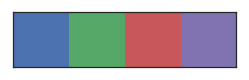

In [7]:
sns.set(style='white', font='times-new-roman', font_scale=2, rc={'lines.linewidth': 5})
color_palette = sns.color_palette([[76/255, 114/255, 176/255, 1],
                                   [85/255, 168/255, 104/255, 1],
                                   [199/255, 87/255, 91/255, 1],
                                   [129/255, 114/255, 178/255, 1]],
                                  n_colors=4)
sns.palplot(color_palette)

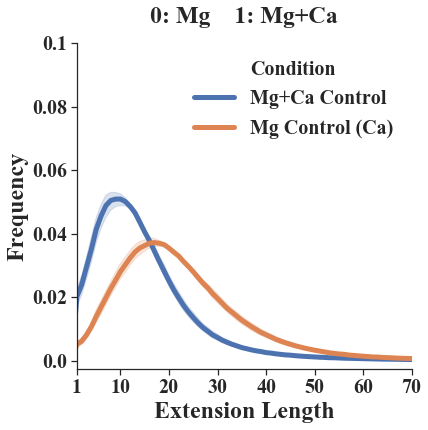

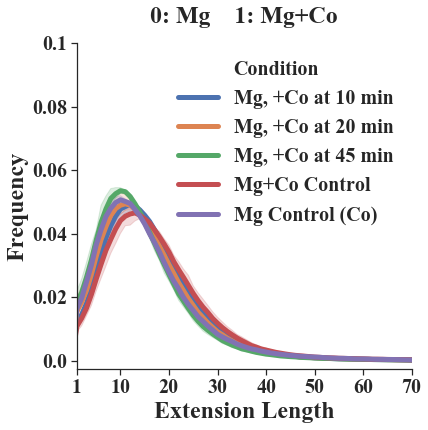

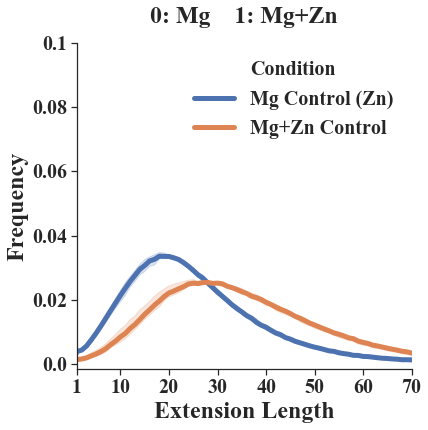

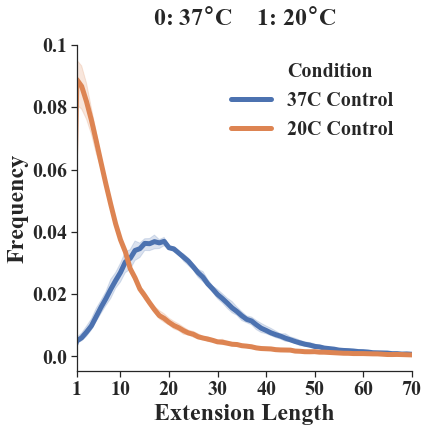

In [8]:
length=70
mpl.rc('font',family='Times New Roman')

signals = ['Ca', 'Co', 'Zn', 'Temp']

for i, signal in enumerate(signals):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    sub_data = len_data[signal]
    
    if signal == 'Temp':
        sub_data = sub_data[sub_data['Signal'] >= 0]
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    sns.lineplot(x='Length', y='% Count', hue='Condition',
                 data=sub_data,
                 ax=ax, err_kws={'alpha': 0.2})

    ax.set_xlim(1, length)
    ax.set_xticks([1] + list(range(10, length + 1, 10)))
    ax.set_xticklabels([1] + list(range(10, length + 1, 10)), fontsize=20)
    ax.set_yticks(np.arange(0, 0.12, 0.02))
    ax.set_yticklabels(np.arange(0, 0.12, 0.02), fontsize=20)
    ax.set_title('Sequence Length Distribution')
    
    ax.legend(fontsize=20, frameon=False)
    
    ax.tick_params(labelleft=True, left=True, bottom=True)
    
    ax.set_xlabel('Extension Length')
    ax.set_ylabel('Frequency')
    
    if signal == 'Temp':
        ax.set_title('0: 37' + r'$\degree$' + 'C    1: 20' + r'$\degree$' + 'C', fontsize=24,
                     pad=20)
    else:
        ax.set_title('0: Mg    1: Mg+{}'.format(signal), fontsize=24, pad=20)
        
    fig.savefig(figure_dir + 'Length_Dists_Final_{}'.format(signal), bbox_inches='tight')
    plt.show()